In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [8]:
df = pd.read_csv('data/tips.csv').sort_values(by='date')
df.head()

,uid,id,tipster,date,track,horse,bet_type,odds,result,tipsteractive
20226,20227,1,Tipster T,2013-03-09,Sandown,Le Reve,Win,13.0,Lose,True
20229,20230,4,Tipster T,2013-03-09,Sandown,Pine Creek,Win,10.0,Lose,True
20227,20228,2,Tipster T,2013-03-09,Sandown,Edmund Kean,Win,5.0,Lose,True
20228,20229,3,Tipster T,2013-03-09,Wolverhampton,Strictly Silver,Win,6.0,Win,True
20230,20231,5,Tipster T,2013-03-15,Cheltenham,Our Vinnie,Win,10.0,Lose,True


In [61]:
dfgrouped = df.groupby(['horse']).count()['date']
common_horses = dfgrouped[dfgrouped >= 10].index.tolist()
common_horses_df = df[df.apply(lambda row: row['horse'] in common_horses, axis=1)]
common_horses_df = common_horses_df.reset_index(drop=True)

common_horses_df = common_horses_df.sample(frac=.1)

In [62]:
win_percents = []
total_races = []

for i, r in common_horses_df.iterrows():
    subset_df = common_horses_df[:i]
    subset_df_horse = subset_df[subset_df.horse == r['horse']]
    
    total_horse_records = len(subset_df_horse)
#     horse_wins = len(subset_df_horse[subset_df_horse.result=='Win'])
#     try:
#         win_percents.append(horse_wins/float(total_horse_records))
#     except ZeroDivisionError:
#         print(r['horse'], horse_wins)
    total_races.append(total_horse_records)
    
# common_horses_df['win_percent_to_date'] = win_percents
common_horses_df['total_races'] = total_races
common_horses_df.head()

,uid,id,tipster,date,track,horse,bet_type,odds,result,tipsteractive,c,total_races
1198,6677,2364,Tipster E,2015-08-19,York,Oasis Fantasy,Win,8.0,Lose,True,#ffbb33,2
1540,17543,1153,Tipster Q,2015-10-17,Ascot,Elm Park,Each Way,21.0,Lose,False,#ffbb33,2
2159,10996,1261,Tipster J,2016-02-06,Lingfield,Grey Mirage,Win,11.0,Lose,True,#ffbb33,1
218,30248,172,Tipster A1,2014-09-20,Ayr,Barnet Fair,Win,29.0,Lose,True,#ffbb33,2
1281,13364,21,Tipster M,2015-09-08,Perth,Dynamic Drive,Each Way,9.0,Win,True,#000000,3


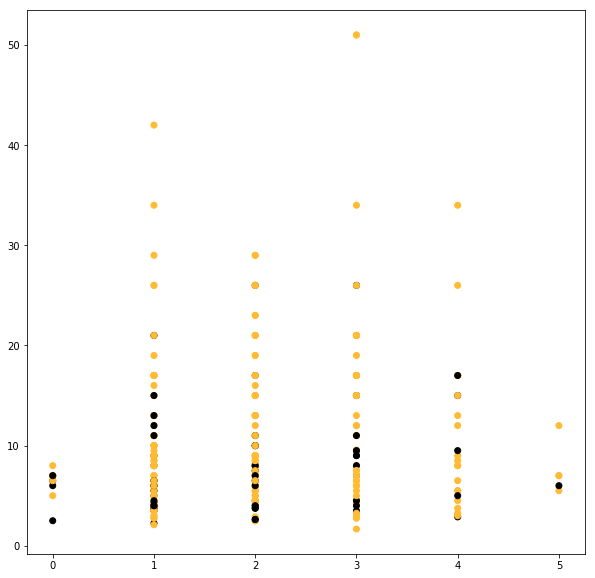

In [63]:
common_horses_df['c'] = common_horses_df.result.replace({'Lose': '#ffbb33', 'Win': '#000000'})
plt.figure(figsize=(10,10))
plt.scatter(common_horses_df.total_races, common_horses_df.odds, c=common_horses_df['c'])

In [56]:
common_horses_df.odds

0       13.00
1       11.00
2       10.00
3       10.00
4        6.50
5        5.50
6        7.00
7        6.00
8       13.00
9        8.00
10       7.00
11       5.00
12       5.50
13       5.00
14       5.50
15       5.00
16       4.00
17       2.50
18       6.50
19       7.00
20       3.00
21      11.00
22      21.00
23       9.00
24       5.00
25       6.50
26       4.50
27       2.75
28       4.50
29      10.00
        ...  
2988    10.00
2989    13.00
2990    11.00
2991     5.50
2992     8.50
2993    21.00
2994    15.00
2995    13.00
2996     8.00
2997     5.50
2998    15.00
2999     9.00
3000    26.00
3001     8.40
3002     8.80
3003     5.00
3004    11.00
3005    11.00
3006    15.00
3007    13.00
3008    17.00
3009     5.00
3010     3.25
3011     2.75
3012     5.00
3013    15.00
3014     6.60
3015    15.00
3016    15.00
3017     4.33
Name: odds, Length: 3018, dtype: float64